In [1]:
import pandas as pd

resenha = pd.read_csv("imdb-reviews-pt-br.csv")
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg  
1  Este é um exemplo do motivo pelo qual a maiori...       neg  
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg  
3  Nem mesmo os Beatles puderam escrever músicas ...       neg  
4  Filmes de fotos de latão não é uma palavra apr...       neg

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(resenha.text_pt,
                                                              resenha.sentiment,
                                                              random_state = 42)

In [4]:
classe_teste

12532    pos
35445    neg
20279    pos
2969     neg
45161    pos
        ... 
16421    pos
39861    pos
309      neg
20638    pos
38935    pos
Name: sentiment, Length: 12365, dtype: object

In [5]:
from sklearn.linear_model import LogisticRegression

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)
print(acuracia)

ValueError: could not convert string to float: 'Embora o filme tenha sido apenas assim, o closed caption foi de longe o melhor que eu já vi! Na maioria das vezes, a ortografia é terrível e a legenda está fora de sincronia. Eu uso o closed captioning mesmo que eu possa ouvir bem, mas acho que muitos atores resmungam. Também muitas vezes a trilha sonora substitui o diálogo. Obrigado!'

In [17]:
print("Negativa \n")
print(resenha.text_pt[189])

Negativa 

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [18]:
print("Positivo \n")
print(resenha.text_pt[49002])

Positivo 

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maio

In [20]:
print(resenha.sentiment.value_counts())

sentiment
neg    24765
pos    24694
Name: count, dtype: int64


In [6]:
classificacao = resenha["sentiment"].replace(["neg", "pos"], [0,1])
resenha["classificacao"] = classificacao


/tmp/ipykernel_419/1076321768.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  classificacao = resenha["sentiment"].replace(["neg", "pos"], [0,1])


In [7]:
resenha.tail()

id                                            text_en  \
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  \
49454  Como a média de votos era muito baixa, e o fat...       pos   
49455  O enredo teve algumas reviravoltas infelizes e...       pos   
49456  Estou espantado com a forma como este filme e ...       pos   
49457  A Christmas Together realmente veio antes do m...       pos   
49458  O drama romântico da classe trabalhadora do di...       pos   

       classificacao  
49454              1  
49455              1  
49456              1  
49457              1  
49458              1

<h3>O filme é muito bom<h3>
<h3>O Filme é muito ruim<h3>

<h4>BAG OF WORDS<h4>

Feacture Extraction Count Vectorizer

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
texto = ["Assisti um filme ótimo", "Assisti um filme ruim"] 
vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(texto)

In [9]:
vetorizar.get_feature_names_out()

array(['Assisti', 'filme', 'ruim', 'um', 'ótimo'], dtype=object)

In [10]:
matriz = pd.DataFrame(bag_of_words, columns=vetorizar.get_feature_names_out())

ValueError: Shape of passed values is (2, 1), indices imply (2, 5)

In [47]:
pd.DataFrame.sparse.from_spmatrix(bag_of_words,columns=vetorizar.get_feature_names_out())

Assisti  filme  ruim  um  ótimo
0        1      1     0   1      1
1        1      1     1   1      0

<h2>Com dados reais<h2>

In [11]:
vetorizar = CountVectorizer(lowercase=False, ) #max_features=50
bag_of_words = vetorizar.fit_transform(resenha.text_pt)
print(bag_of_words.shape)

(49459, 156923)


Oq precisamos fazer é utilizar métodos q vao ajudar a trazer as palavras mais relevantes pra esse numero de 50.

In [12]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              texto[coluna_classificacao],
                                                              random_state = 42)
    regressao_logistica = LogisticRegression(solver = "lbfgs")
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)
print(classificar_texto(resenha, "text_pt", "classificacao"))

0.6583097452486858


In [13]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.3/548.3 kB 1.7 MB/s eta 0:00:00:00:010:01


In [16]:
%matplotlib inline
from wordcloud import WordCloud

todas_palavras = ' '.join([texto for texto in resenha.text_pt])
nuvem_palavras = WordCloud().generate(todas_palavras)

In [17]:
len(todas_palavras)

63448424

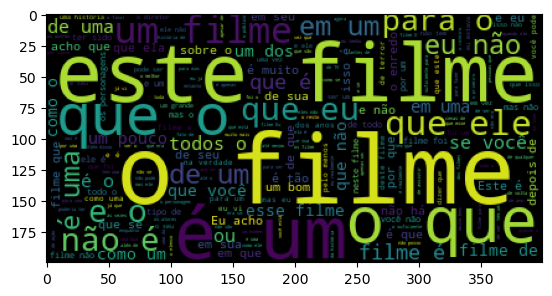

In [18]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(nuvem_palavras)
plt.show()

In [19]:
from wordcloud import WordCloud

todas_palavras = ' '.join([texto for texto in resenha.text_pt])
nuvem_palavras = WordCloud(width=800, height= 500,
                          max_font_size= 110
                          ).generate(todas_palavras)

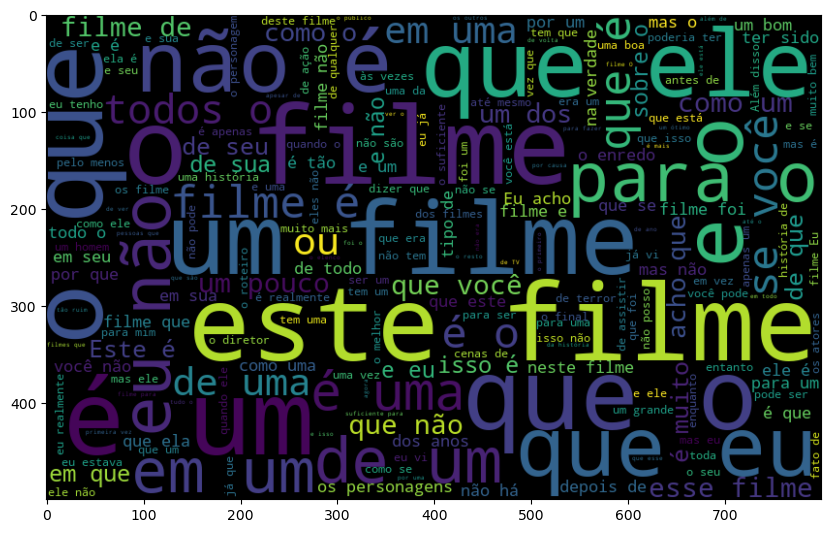

In [20]:
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.show()

In [21]:

todas_palavras = ' '.join([texto for texto in resenha.text_pt])
nuvem_palavras = WordCloud(width=800, height= 500,
                          max_font_size= 110, collocations=False
                          ).generate(todas_palavras)

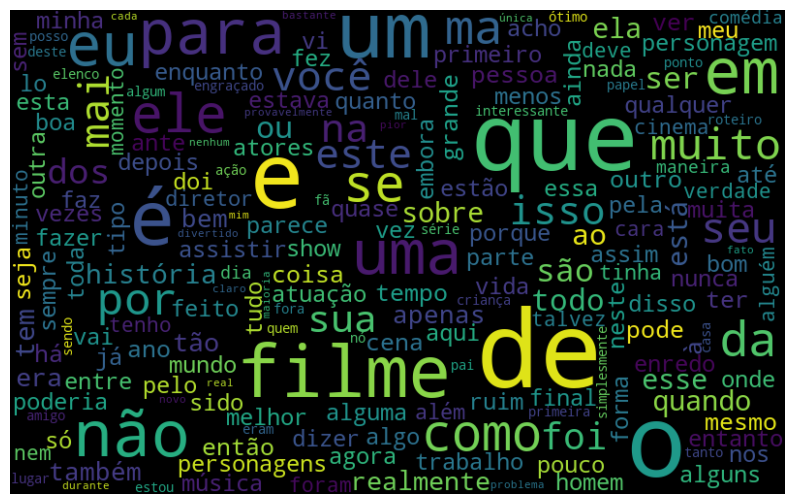

In [22]:
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis("off")
plt.show()

<h1>SEGREGANDO em pos e negativo<h1>

In [23]:
resenha_neg = resenha[resenha.sentiment == 'neg'] 
resenha_neg

id                                            text_en  \
0          1  Once again Mr. Costner has dragged out a movie...   
1          2  This is an example of why the majority of acti...   
2          3  First of all I hate those moronic rappers, who...   
3          4  Not even the Beatles could write songs everyon...   
4          5  Brass pictures movies is not a fitting word fo...   
...      ...                                                ...   
37113  37115  Towards the end of the movie, I felt it was to...   
37114  37116  This is the kind of movie that my enemies cont...   
37115  37117  I saw Descent last night at the Stockholm Film...   
37116  37118  Some films that you pick up for a pound turn o...   
37117  37119  This is one of the dumbest films, Ive ever see...   

                                                 text_pt sentiment  \
0      Mais uma vez, o Sr. Costner arrumou um filme p...       neg   
1      Este é um exemplo do motivo pelo qual a maiori...       neg   
2      Primeiro de tudo eu odeio esses raps imbecis, ...       neg   
3      Nem mesmo os Beatles puderam escrever músicas ...       neg   
4      Filmes de fotos de latão não é uma palavra apr...       neg   
...                                                  ...       ...   
37113  No final do filme, senti que era muito técnico...       neg   
37114  Este é o tipo de filme que meus inimigos me as...       neg   
37115  Eu vi Descent na noite passada no Stockholm Fi...       neg   
37116  Alguns filmes que você escolhe por um quilo sã...       neg   
37117  Este é um dos filmes mais idiotas que já vi. E...       neg   

       classificacao  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
37113              0  
37114              0  
37115              0  
37116              0  
37117              0  

[24765 rows x 5 columns]

In [24]:
def nuvem_palavras_neg(texto, coluna_texto):
    texto_negativo = texto[resenha.sentiment == 'neg'] 
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])

    nuvem_palvras = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palvras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [25]:
def nuvem_palavras_pos(texto, coluna_texto):
    texto_positivo = texto[resenha.sentiment == 'pos'] 
    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])

    nuvem_palvras = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palvras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

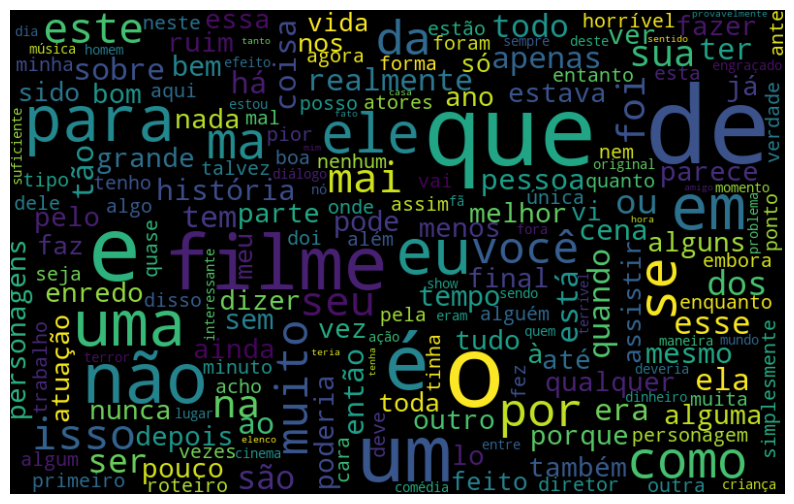

In [26]:
nuvem_palavras_neg(resenha, "text_pt")


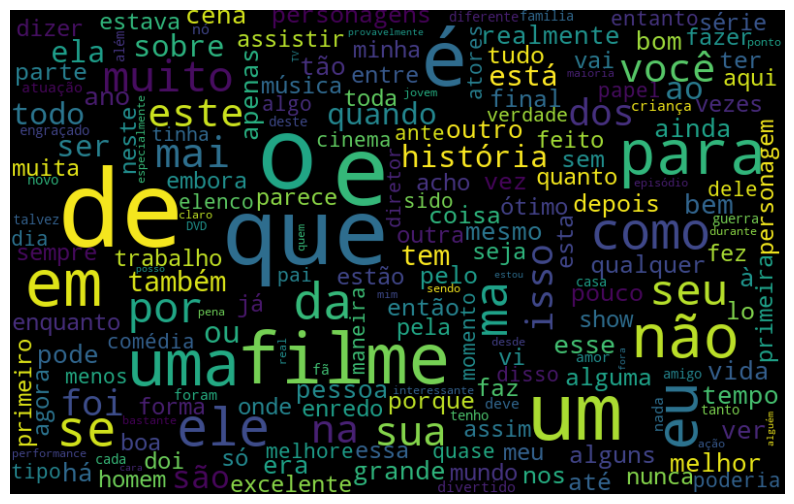

In [27]:
nuvem_palavras_pos(resenha, "text_pt")


<h2>Tokenização NLTK </h2>

In [28]:
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 128.7 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 785.0/785.0 kB 915.9 kB/s eta 0:00:0000:0100:01


In [29]:
import nltk 
frases = ["um filme bom", "um filme ruim"]
frequencia = nltk.FreqDist(frases)
frequencia

FreqDist({'um filme bom': 1, 'um filme ruim': 1})

In [30]:
from nltk import tokenize

frase = "Bem vindo ao mundo do PLN!"

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']


In [31]:
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})

In [32]:
df_frequencia.nlargest(columns = "Frequência", n = 10).sort_values(by=['Frequência'], ascending=False)


Palavra  Frequência
20       de      417651
14      que      325070
42        e      299743
3         o      244881
7        um      216410
102       a      210179
45        é      192381
200      em      132778
1       uma      130888
29      não      127915

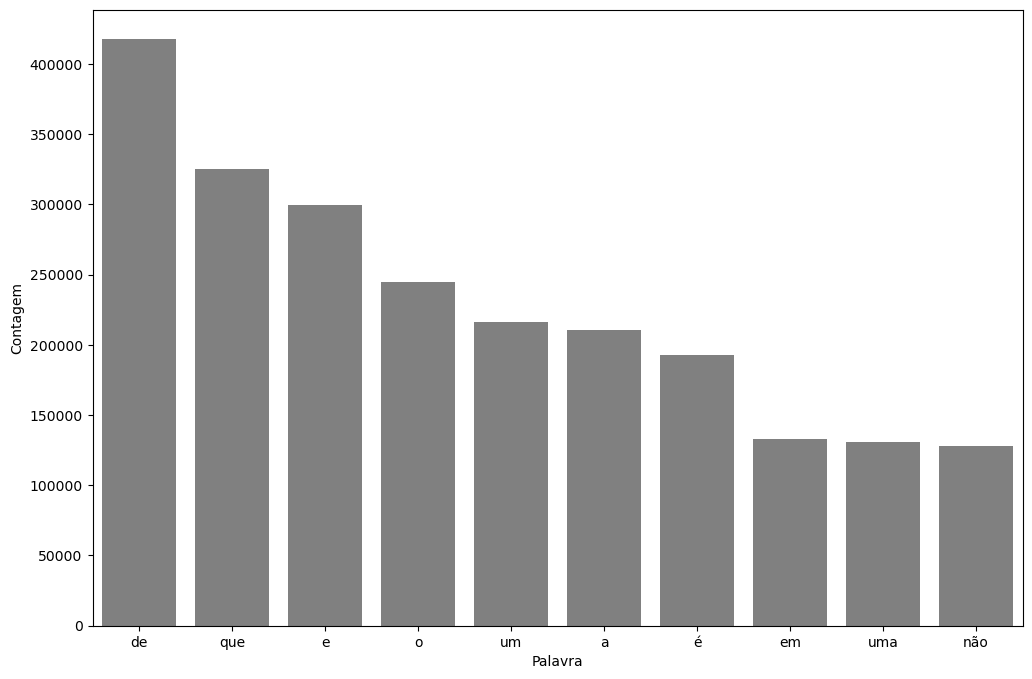

In [33]:
import seaborn as sns
    
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()



pareto(resenha, "text_pt", 10)

In [34]:
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package name

True

In [35]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

frase_processada = list()
for opiniao in resenha.text_pt:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_1"] = frase_processada

In [36]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0   
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0   
4  Filmes de fotos de latão não é uma palavra apr...       neg              0   

                                        tratamento_1  
0  Mais vez, Sr. Costner arrumou filme tempo nece...  
1  Este exemplo motivo maioria filmes ação mesmos...  
2  Primeiro tudo odeio raps imbecis, poderiam agi...  
3  Nem Beatles puderam escrever músicas todos gos...  
4  Filmes fotos latão palavra apropriada eles, ve...

In [37]:
classificar_texto(resenha, "tratamento_1", "classificacao")


0.6810351799433886

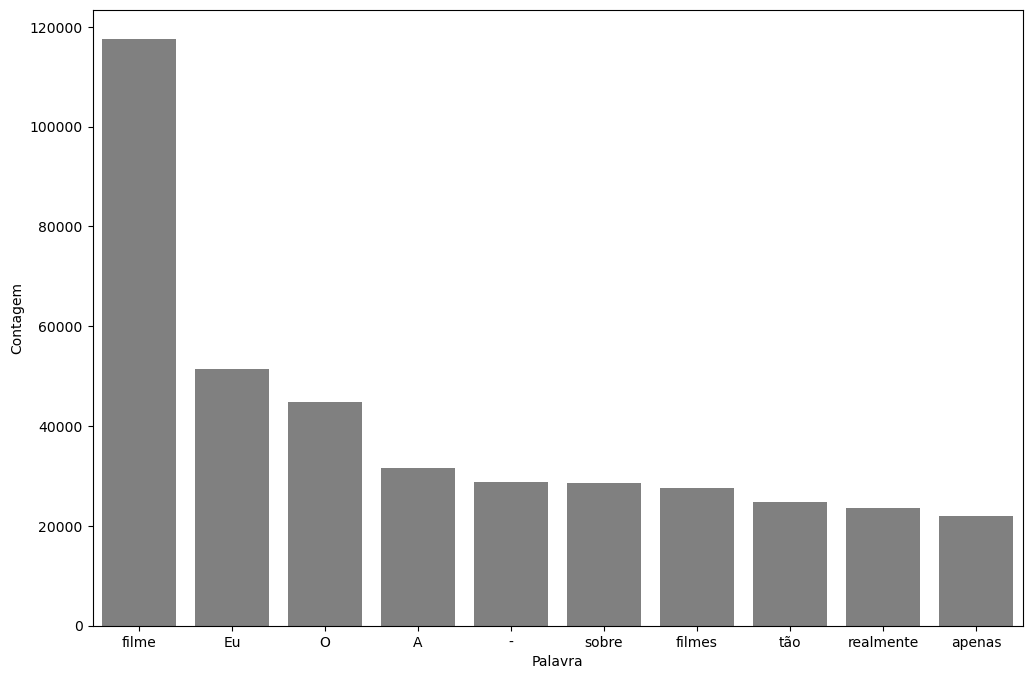

In [38]:
pareto(resenha,"tratamento_1", 10)


In [39]:
from nltk import tokenize

frase = "Olá mundo!"
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)
print(token_frase)


['Olá', 'mundo', '!']


In [40]:
from string import punctuation

pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

In [108]:
pontuacao

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [41]:
pontuacao_stopwords = pontuacao + palavras_irrelevantes


In [42]:
frase_processada = list()
for opiniao in resenha["tratamento_1"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_2"] = frase_processada

In [43]:
resenha.head()


id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0   
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0   
4  Filmes de fotos de latão não é uma palavra apr...       neg              0   

                                        tratamento_1  \
0  Mais vez, Sr. Costner arrumou filme tempo nece...   
1  Este exemplo motivo maioria filmes ação mesmos...   
2  Primeiro tudo odeio raps imbecis, poderiam agi...   
3  Nem Beatles puderam escrever músicas todos gos...   
4  Filmes fotos latão palavra apropriada eles, ve...   

                                        tratamento_2  
0  Mais vez Sr Costner arrumou filme tempo necess...  
1  Este exemplo motivo maioria filmes ação mesmos...  
2  Primeiro tudo odeio raps imbecis poderiam agir...  
3  Nem Beatles puderam escrever músicas todos gos...  
4  Filmes fotos latão palavra apropriada verdade ...

In [44]:
resenha["tratamento_1"][0]


'Mais vez, Sr. Costner arrumou filme tempo necessário. Além terríveis seqüências resgate mar, quais poucas, simplesmente importei nenhum personagens. A maioria fantasmas armário, personagem Costers realizado logo início, esquecido tarde, importava. O personagem deveríamos importar arrogante superconfiante, Ashton Kutcher. O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado. Seu único obstáculo parece vencendo Costner. Finalmente, bem além meio caminho, Costner conta sobre fantasmas Kutchers. Somos informados Kutcher levado melhor pressentimentos presságios anteriores. Nenhuma mágica aqui, tudo podia fazer desligar hora.'

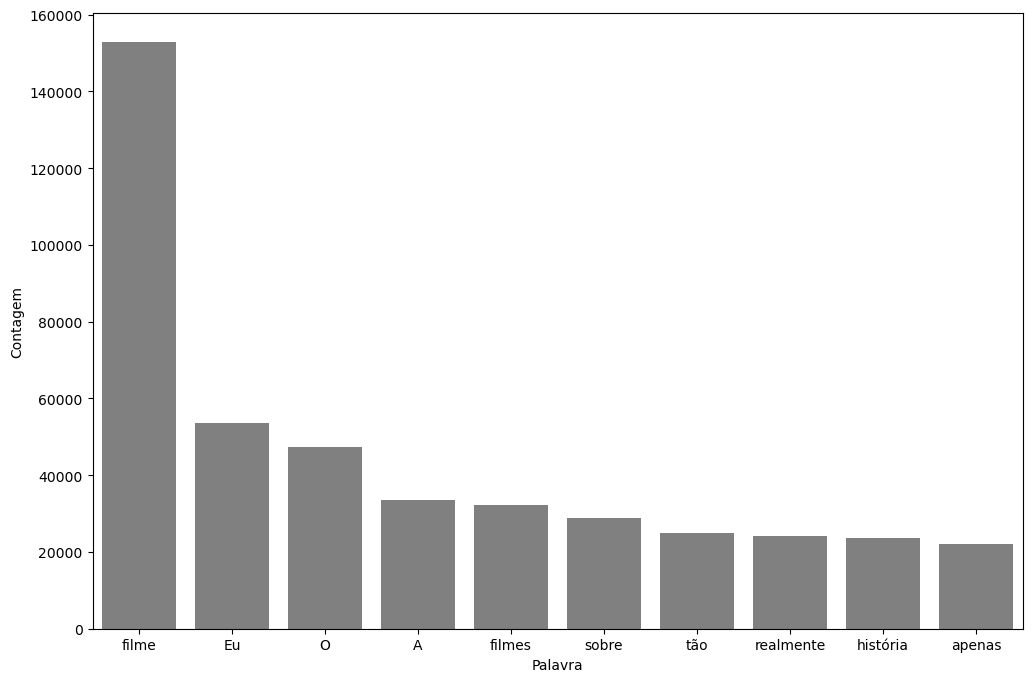

In [45]:
pareto(resenha, "tratamento_2", 10)


In [46]:
!pip install Unidecode


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 1.2 MB/s eta 0:00:00a 0:00:01


In [47]:
import unidecode

acentos = "ótimo péssimo não é tão"

teste = unidecode.unidecode(acentos)
print(teste)

otimo pessimo nao e tao


In [48]:
sem_acentos = [unidecode.unidecode(texto) for texto in resenha["tratamento_2"]]


In [49]:
sem_acentos[0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

In [50]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]


In [51]:
resenha["tratamento_3"] = sem_acentos

frase_processada = list()
for opiniao in resenha["tratamento_3"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_3"] = frase_processada

In [52]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0   
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0   
4  Filmes de fotos de latão não é uma palavra apr...       neg              0   

                                        tratamento_1  \
0  Mais vez, Sr. Costner arrumou filme tempo nece...   
1  Este exemplo motivo maioria filmes ação mesmos...   
2  Primeiro tudo odeio raps imbecis, poderiam agi...   
3  Nem Beatles puderam escrever músicas todos gos...   
4  Filmes fotos latão palavra apropriada eles, ve...   

                                        tratamento_2  \
0  Mais vez Sr Costner arrumou filme tempo necess...   
1  Este exemplo motivo maioria filmes ação mesmos...   
2  Primeiro tudo odeio raps imbecis poderiam agir...   
3  Nem Beatles puderam escrever músicas todos gos...   
4  Filmes fotos latão palavra apropriada verdade ...   

                                        tratamento_3  
0  Mais vez Sr Costner arrumou filme tempo necess...  
1  Este exemplo motivo maioria filmes acao mesmos...  
2  Primeiro tudo odeio raps imbecis poderiam agir...  
3  Nem Beatles puderam escrever musicas todos gos...  
4  Filmes fotos latao palavra apropriada verdade ...

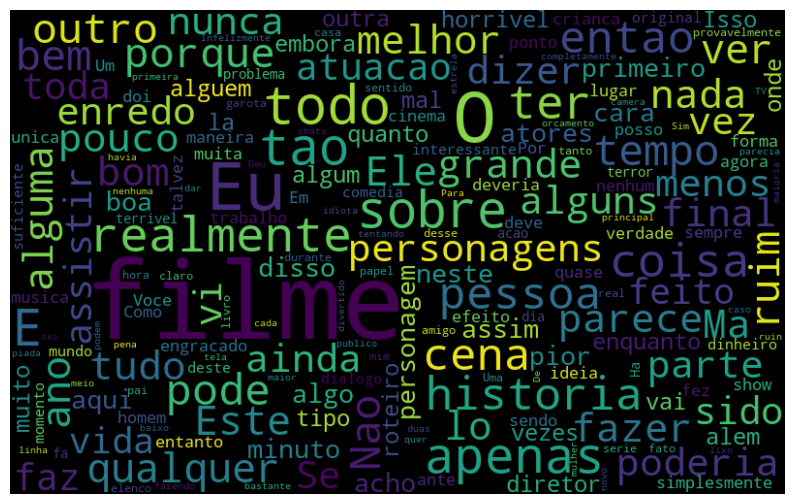

In [53]:
nuvem_palavras_neg(resenha, "tratamento_3")


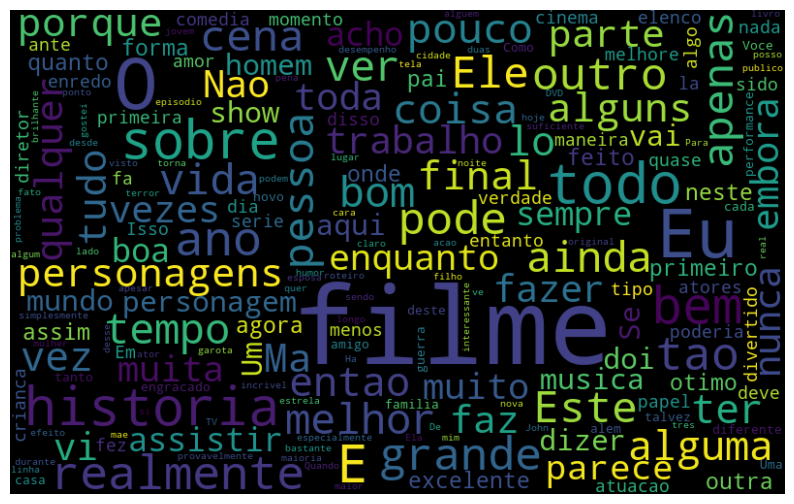

In [54]:
nuvem_palavras_pos(resenha, "tratamento_3")


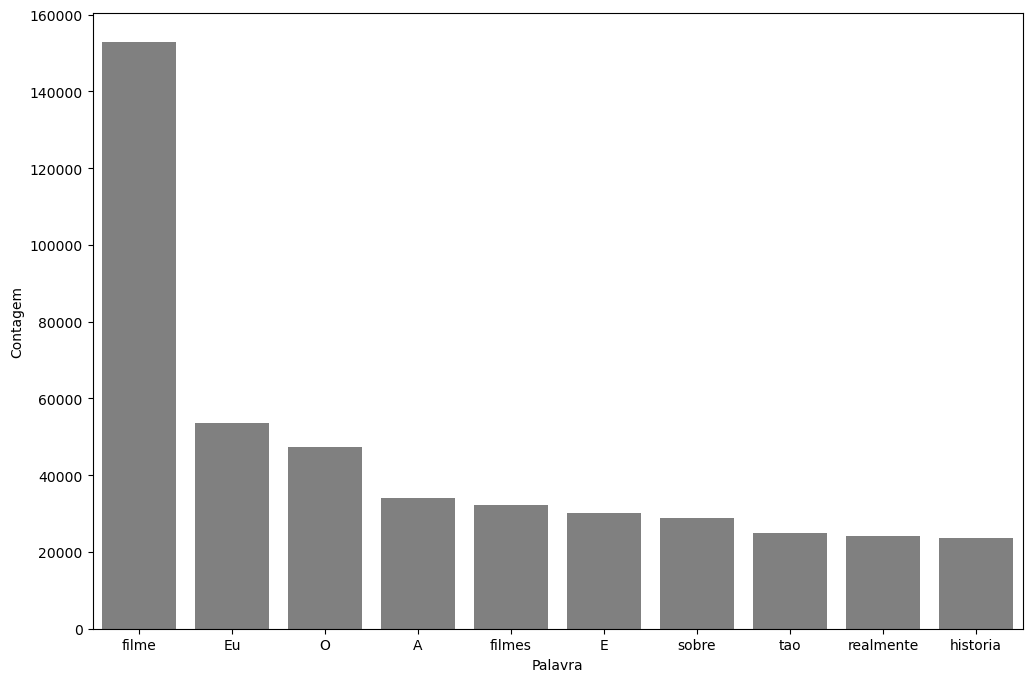

In [55]:
pareto(resenha, "tratamento_3", 10)


In [56]:
acuracia_tratamento3 = classificar_texto(resenha, "tratamento_3", "classificacao")
print(acuracia_tratamento3)

0.6887990295188031


In [57]:
frase = "Seja Bem VindO ao NLP"
print(frase.lower())

seja bem vindo ao nlp


In [58]:
frase_processada = list()
for opiniao in resenha["tratamento_3"]:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_4"] = frase_processada

In [59]:
resenha["text_pt"][0]


'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [60]:
resenha["tratamento_4"][0]


'vez sr costner arrumou filme tempo necessario alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens maioria fantasmas armario personagem costers realizado logo inicio esquecido tarde importava personagem deveriamos importar arrogante superconfiante ashton kutcher problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado unico obstaculo parece vencendo costner finalmente bem alem meio caminho costner conta sobre fantasmas kutchers informados kutcher levado melhor pressentimentos pressagios anteriores nenhuma magica aqui tudo podia fazer desligar hora'

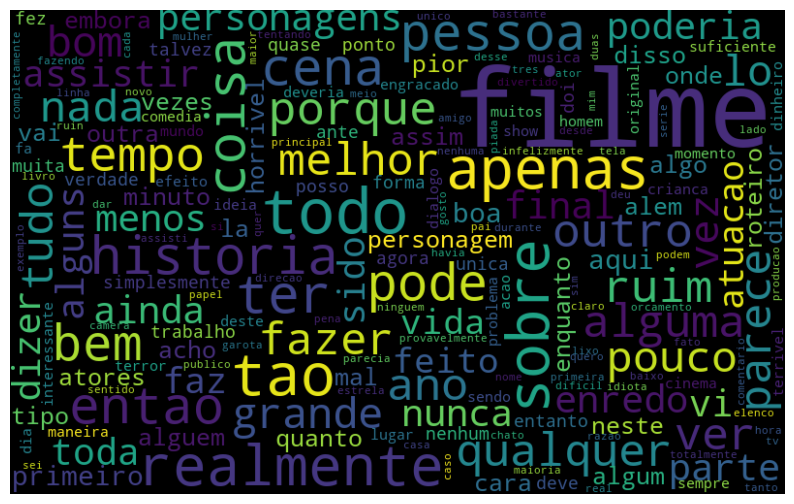

In [61]:
nuvem_palavras_neg(resenha, "tratamento_4")


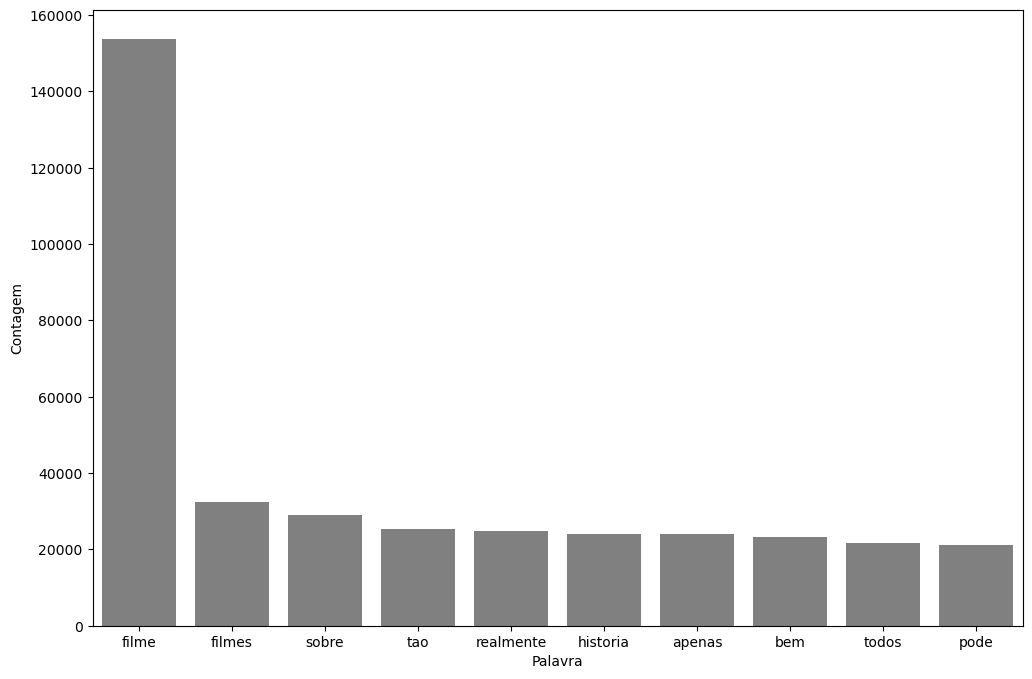

In [62]:
pareto(resenha, "tratamento_4", 10)


In [63]:
acuracia_tratamento4 = classificar_texto(resenha, "tratamento_4", "classificacao")
print(acuracia_tratamento4)
print(acuracia_tratamento3)

0.688071168621108
0.6887990295188031


<h3> RSLP Stemmer</h3>

In [66]:

 nltk.download('rslp')


[nltk_data] Downloading package rslp to /home/jovyan/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [67]:
stemmer = nltk.RSLPStemmer()
stemmer.stem("corredor")

'corr'

In [73]:
stemmer.stem("corrida")

'corr'

In [68]:
frase_processada = list()
for opiniao in resenha["tratamento_4"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_5"] = frase_processada

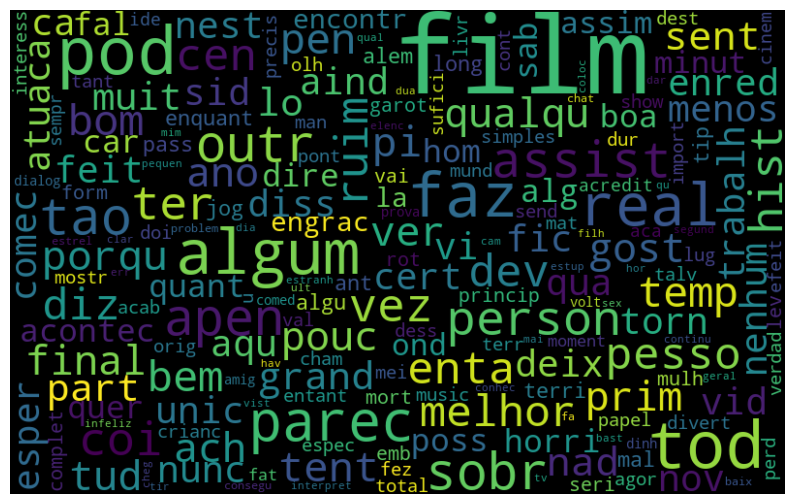

In [69]:
nuvem_palavras_neg(resenha, "tratamento_5")


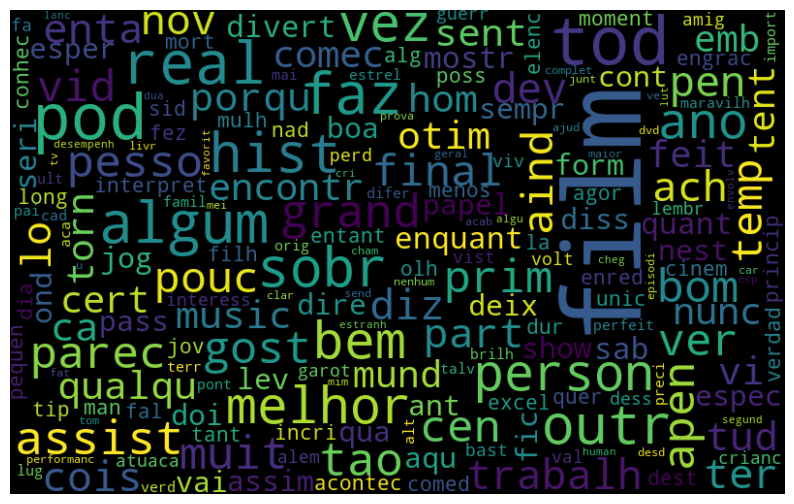

In [70]:
nuvem_palavras_pos(resenha,"tratamento_5")


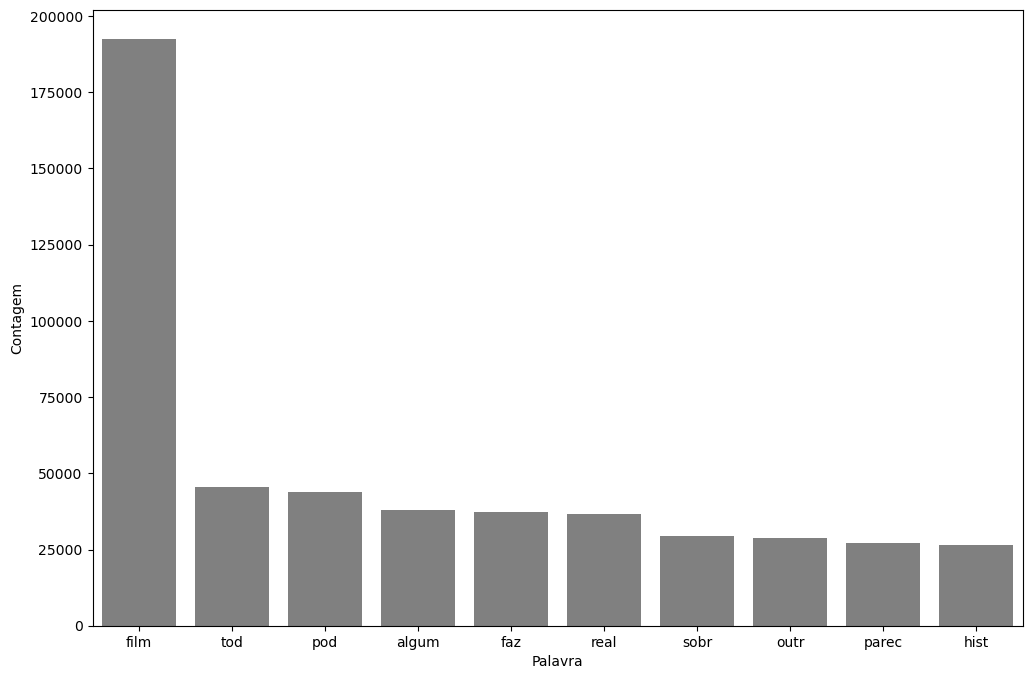

In [71]:
pareto(resenha, "tratamento_5", 10)


In [72]:
acuracia_tratamento5 = classificar_texto(resenha, "tratamento_5", "classificacao")
print(acuracia_tratamento5)
print(acuracia_tratamento4)

0.6955923978972908
0.688071168621108


<h3>Lemma</h3>

In [77]:
!pip install spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 kB 726.1 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 7.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 279.7 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.0/182.0 kB 812.5 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.2/157.2 kB 1.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.3/409.3 kB 1.8 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 5.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 389.8 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.9/490.9 kB 2.8 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.1/920.1 kB 3.1 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 350.5 kB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━

In [78]:
!python3 -m spacy download pt

⚠ As of spaCy v3.0, shortcuts like 'pt' are deprecated. Please use the
full pipeline package name 'pt_core_news_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 7.9 MB/s eta 0:00:00:00:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [79]:
import spacy
nlp = spacy.load('pt_core_news_sm')

In [90]:
df_palavras = pd.DataFrame(['amigos', 'amigas', 'amizade', 'carreira', 'carreiras'], columns=['Original'])


In [91]:
doc = nlp(str([palavra for palavra in df_palavras['Original']]))
doc

['amigos', 'amigas', 'amizade', 'carreira', 'carreiras']

In [92]:
df_palavras['lemma'] = [token.lemma_ for token in doc if token.pos_ == 'NOUN']
df_palavras

Original     lemma
0     amigos     amigo
1     amigas     amiga
2    amizade   amizade
3   carreira  carreira
4  carreiras  carreira

<h3>TF - IDF</h3>

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer

frases = ["Assisti um filme ótimo", "Assisti um filme péssimo"] 
tfidf = TfidfVectorizer(lowercase=False, max_features=50)
caracteristicas = tfidf.fit_transform(frases)
tfidf.get_feature_names_out()

array(['Assisti', 'filme', 'péssimo', 'um', 'ótimo'], dtype=object)

In [100]:
caracteristicas

<2x5 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [101]:
pd.DataFrame.sparse.from_spmatrix(caracteristicas, columns=tfidf.get_feature_names_out())

Assisti     filme   péssimo        um     ótimo
0  0.448321  0.448321         0  0.448321  0.630099
1  0.448321  0.448321  0.630099  0.448321         0

In [102]:
tfidf_bruto = tfidf.fit_transform(resenha['text_pt'])
treino, teste , classe_treino, classe_teste = train_test_split(tfidf_bruto, 
                                                               resenha['classificacao']
                                                               ,random_state=42)


In [103]:
regressao_logistica.fit(treino,classe_treino)
acuracia_tfidf_bruto = regressao_logistica.score(teste,classe_teste)
print(acuracia_tfidf_bruto)

0.6604933279417712


In [104]:
resenha.head(3)

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   

                                             text_pt sentiment  classificacao  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0   
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0   

                                        tratamento_1  \
0  Mais vez, Sr. Costner arrumou filme tempo nece...   
1  Este exemplo motivo maioria filmes ação mesmos...   
2  Primeiro tudo odeio raps imbecis, poderiam agi...   

                                        tratamento_2  \
0  Mais vez Sr Costner arrumou filme tempo necess...   
1  Este exemplo motivo maioria filmes ação mesmos...   
2  Primeiro tudo odeio raps imbecis poderiam agir...   

                                        tratamento_3  \
0  Mais vez Sr Costner arrumou filme tempo necess...   
1  Este exemplo motivo maioria filmes acao mesmos...   
2  Primeiro tudo odeio raps imbecis poderiam agir...   

                                        tratamento_4  \
0  vez sr costner arrumou filme tempo necessario ...   
1  exemplo motivo maioria filmes acao mesmos gene...   
2  primeiro tudo odeio raps imbecis poderiam agir...   

                                        tratamento_5  
0  vez sr costn arrum film temp necessari alem te...  
1  exempl motiv maior film aca mesm gener chat na...  
2  prim tud odei rap imbecil pod agir arm pressio...

In [106]:
tf_idftratado = tfidf.fit_transform(resenha['tratamento_5'])
treino, teste , classe_treino, classe_teste = train_test_split(tf_idftratado, 
                                                               resenha['classificacao']
                                                                ,random_state=42)
regressao_logistica.fit(treino,classe_treino)
acuracia_tfidf_tratado = regressao_logistica.score(teste,classe_teste)
print(acuracia_tfidf_tratado)                                                              


0.6964820056611403


In [112]:
from nltk import ngrams
frase= 'Assisti um filme ótimo'
frase_separada = token_espaco.tokenize(frase)
pares = ngrams(frase_separada,2)
list(pares)

[('Assisti', 'um'), ('um', 'filme'), ('filme', 'ótimo')]

In [109]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))
vetor_idf = tfidf.fit_transform(resenha['tratamento_5'])


In [113]:
treino, teste , classe_treino, classe_teste = train_test_split(vetor_idf, 
                                                               resenha['classificacao']
                                                                ,random_state=42)

In [114]:
regressao_logistica.fit(treino,classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste,classe_teste)
print(acuracia_tfidf_ngrams)       

0.886696320258795


In [115]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index = tfidf.get_feature_names_out()
)

In [116]:
pesos.nlargest(20,0)

0
otim         9.805996
excel        9.176871
perfeit      7.041964
maravilh     6.379170
favorit      5.915423
incri        5.843020
divert       5.377406
brilh        4.938538
ador         4.603252
hoj          4.547631
agrada       4.307603
definitiv    4.244611
recom        4.164410
hilari       4.065997
am           4.040351
surpreend    3.951732
vid          3.938862
aind         3.938814
melhor film  3.849544
class        3.715560

In [117]:
pesos.nsmallest(10,0)

0
ruim   -11.526661
pi     -11.351851
horri   -9.804468
terri   -8.456541
chat    -7.724487
nad     -7.658226
parec   -6.793719
nenhum  -6.411036
tent    -5.947673
mal     -5.764175